<a href="https://colab.research.google.com/github/samimisami/samimisami/blob/main/SummerProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GLOBAL AI HUB SUMMER CAMP**

PROJECT 1 - End to end Data Science

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import pandas as pd

In [47]:
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [48]:
df.shape

(1338, 7)

In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


**3. KEŞİFSEL VERİ ANALİZİ**


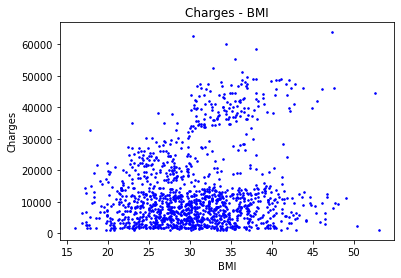

In [50]:
#3.1 - Bmi(Vücut Kitle İndeksi)’nin dağılımını inceleyiniz
#plt.figure(figsize=(15,8))
#sns.distplot(df['bmi']);
plt.scatter(df.bmi, df.charges, s=10, c='b', marker='.')
plt.title("Charges - BMI")
plt.xlabel("BMI")
plt.ylabel("Charges");
#Vücut Kitle indeksi 30-45 arasında olanların hastane masrafı daha fazla.

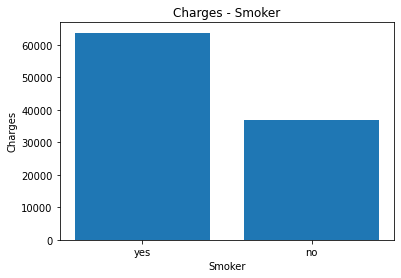

In [51]:
#3.2 - “smoker” ile “charges” arasındaki ilişkiyi inceleyiniz
plt.bar(df.smoker, df.charges)
plt.title("Charges - Smoker")
plt.xlabel("Smoker")
plt.ylabel("Charges");
#Sigara içenlerin masrafı yaklaşık %40 daha fazla.

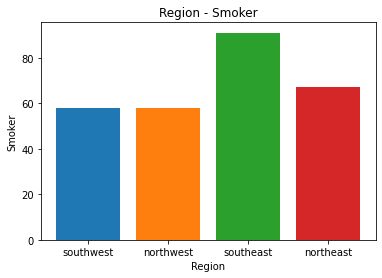

In [53]:
#3.3 - “smoker” (Sigara tüketen) ile “region”(Bölge) arasındaki ilişkiyi inceleyiniz.
#from sklearn import preprocessing
#label_encoder = sk.preprocessing.LabelEncoder()
#df['smoker']= label_encoder.fit_transform(df['smoker'])
x = df["region"]
y = df["smoker"]
a = list(zip(x,y))
southwest, northwest, southeast, northeast = 0,0,0,0
for i, j in a:
    if i =="southwest" and j == "yes":
        southwest += 1
    if i =="northwest" and j == "yes":
        northwest += 1
    if i =="southeast" and j == "yes":
        southeast += 1
    if i =="northeast" and j == "yes":
        northeast += 1
plt.bar("southwest", southwest)
plt.bar("northwest", northwest)
plt.bar("southeast", southeast)
plt.bar("northeast", northeast)
plt.title("Region - Smoker")
plt.xlabel("Region")
plt.ylabel("Smoker");
#En fazla sigara içilen bölge Southeast'dir.

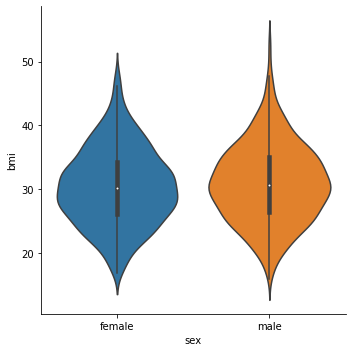

In [55]:
#3.4 - “bmi” ile “sex”(Cinsiyet) arasındaki ilişkiyi inceleyiniz.
sns.catplot(x = "sex", y = "bmi", kind = "violin", data = df)
#Erkeklerin bmi aralığı daha genişken kadınlarınki daha dardır.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


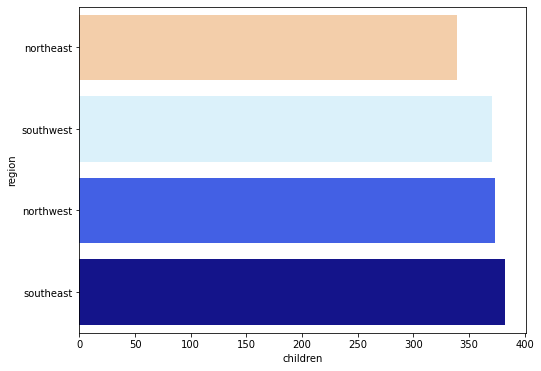

In [56]:
#3.5 - En çok “children”’a sahip “region”’ı bulunuz.
df_region = df.groupby(['region']).agg({'children':"sum"})
children = df['children'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(children.head(), children.head().index, palette='flag')
#En çok çocuk Southeast bölgesindedir.

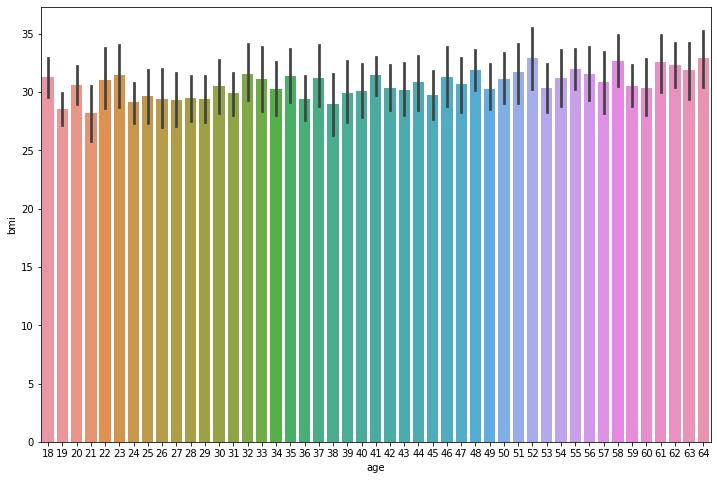

In [62]:
#3.6 - “Age” ile “bmi” arasındaki ilişkiyi inceleyiniz.
#sns.lmplot(x='age',y='bmi',data=df,aspect=2,height=6)
plt.figure(figsize=(12,8))
sns.barplot(x = "age", y = "bmi", data = df)
#Yaşın bmi'a etkisi yoktur.

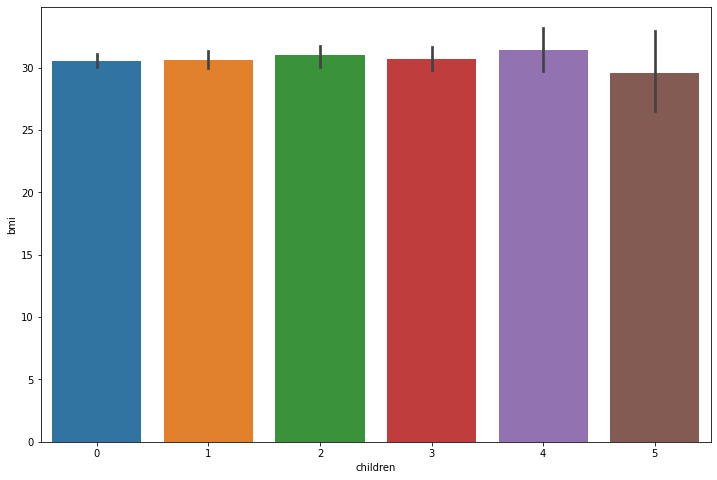

In [63]:
#3.7 - “bmi” ile “children” arasındaki ilişkiyi inceleyiniz.
plt.figure(figsize=(12,8))
sns.barplot(x = "children", y = "bmi", data = df)
#Children'ın bmi'a etkisi yoktur.

lower bound is 13.7
upper bound is 47.290000000000006
1. Çeyrek değeri:  26.29625
3. Çeyrek değeri:  34.69375
116. outlier'ın BMI değeri: 49.06
286. outlier'ın BMI değeri: 48.07
401. outlier'ın BMI değeri: 47.52
543. outlier'ın BMI değeri: 47.41
847. outlier'ın BMI değeri: 50.38
860. outlier'ın BMI değeri: 47.6
1047. outlier'ın BMI değeri: 52.58
1088. outlier'ın BMI değeri: 47.74
1317. outlier'ın BMI değeri: 53.13


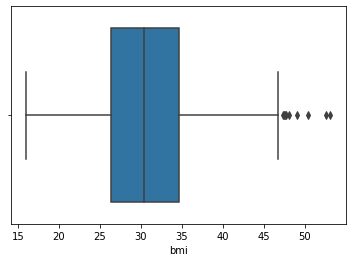

In [76]:
#3.8 - “bmi” değişkeninde outlier var mıdır? İnceleyiniz.
df_table = df["bmi"].copy()
sns.boxplot(x = df_table);
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("lower bound is {}".format(lower_bound))
print("upper bound is {}".format(upper_bound))
print("1. Çeyrek değeri: ",Q1)
print("3. Çeyrek değeri: ",Q3)
outliers_vector = (df_table < (lower_bound)) | (df_table > (upper_bound))
outliers = df_table[outliers_vector]
outliers.index #aykırı değerlerin indexlerini elde ediyoruz.
for i in outliers.index:
    print(str(i)+". outlier'ın BMI değeri:", df["bmi"][i])
#Outlier değerleri aşağıdaki gibi listelenmiştir. Grafikteki noktalar outlier değerleri temsil etmektedir.

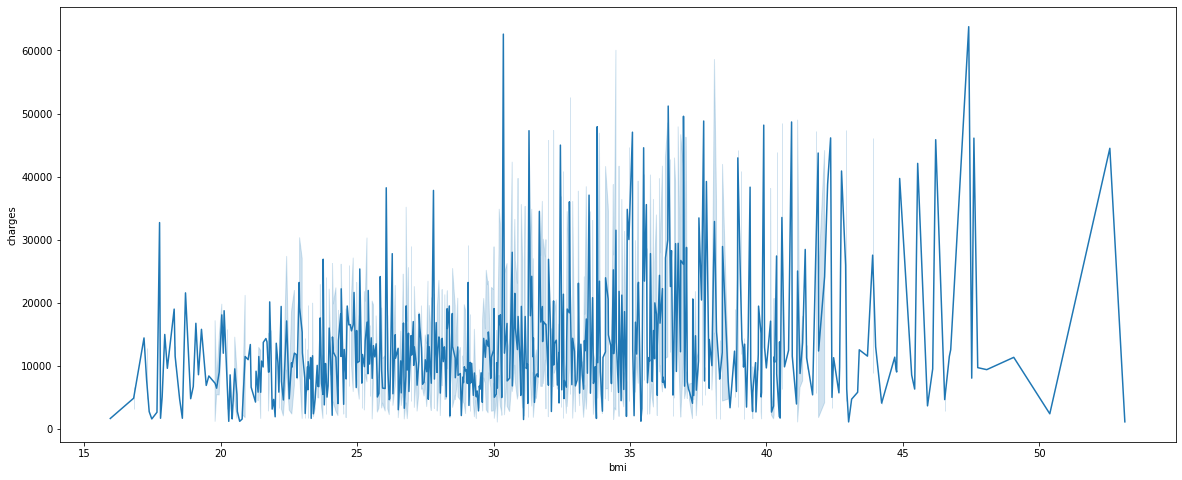

In [79]:
#3.9 - “bmi” ile “charges” arasındaki ilişkiyi inceleyiniz.
plt.figure(figsize=(20,8))
sns.lineplot(x = "bmi", y = "charges", data = df)
#Bir korrelasyon yakalayamadık.

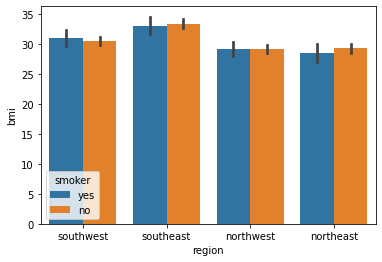

In [82]:
#3.10 - “region”, “smoker” ve “bmi” arasındaki ilişkiyi bar plot kullanarak inceleyiniz.
sns.barplot(x = "region", y = "bmi", hue = "smoker", data = df)
#bmi'ı en yüksek olan bölge Southeast'dir. Başka bir korrelasyon yakalayamadık.

**4. Veri Ön İşleme Yapılması**


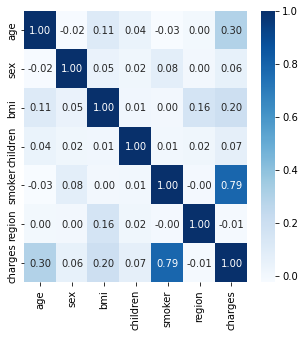

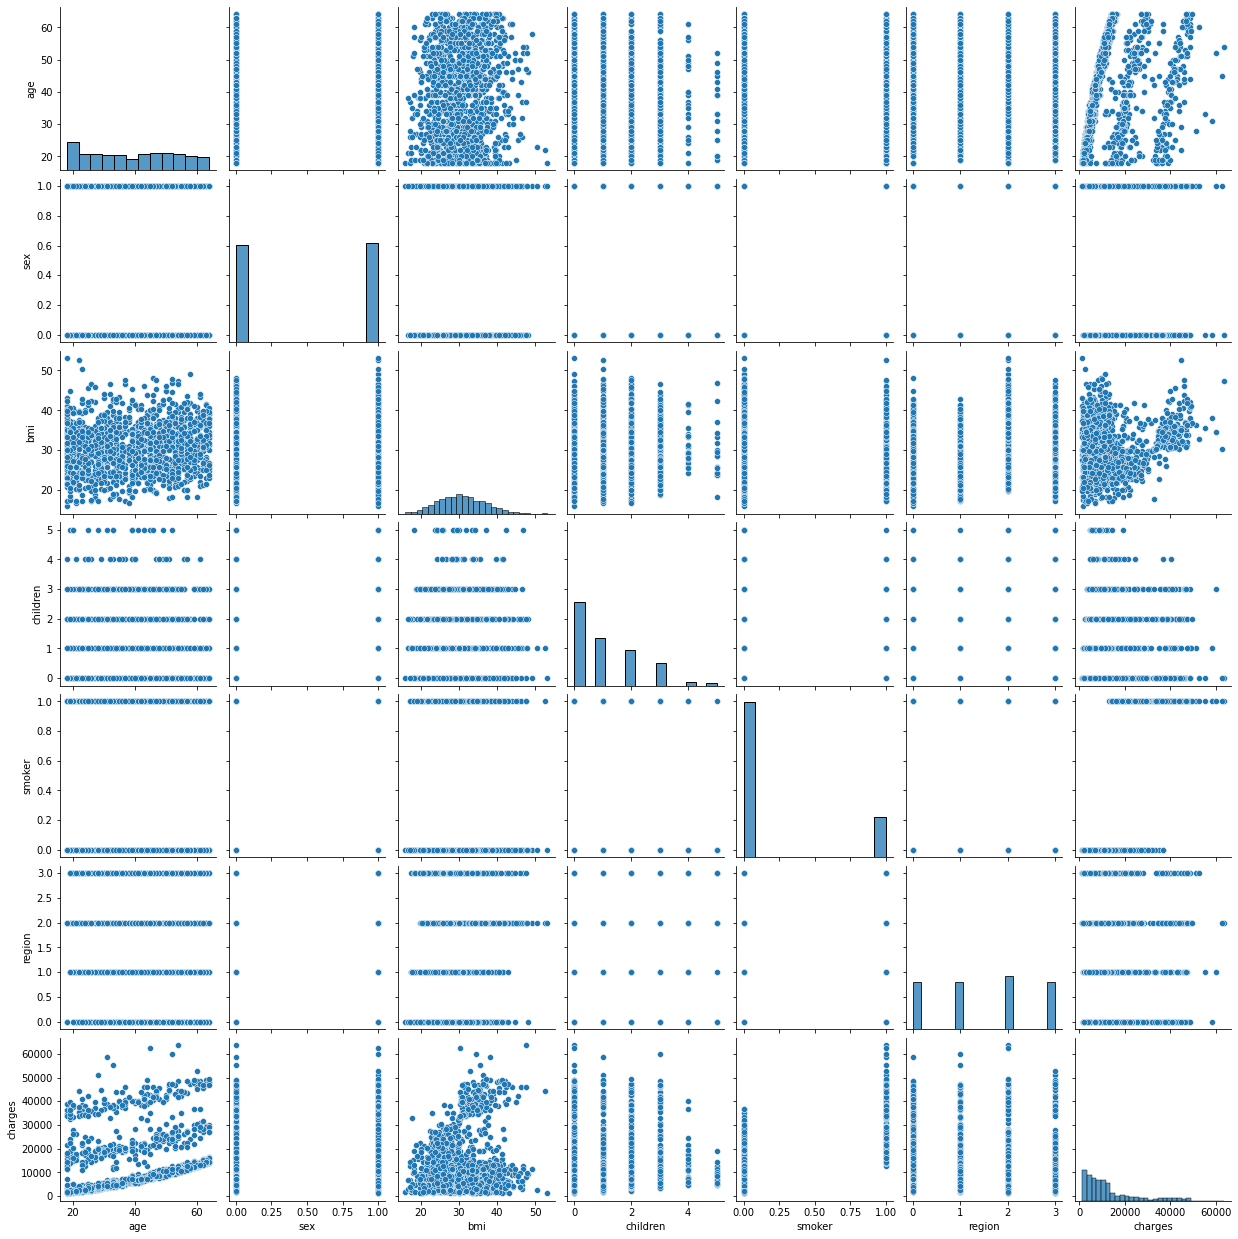

In [84]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

encoder.fit(df.sex.drop_duplicates())
df.sex = encoder.transform(df.sex)

encoder.fit(df.smoker.drop_duplicates())
df.smoker = encoder.transform(df.smoker)

encoder.fit(df.region.drop_duplicates())
df.region = encoder.transform(df.region)

df.dtypes
corr = df.corr()
fig, ax = plt.subplots(figsize = (5,5))

ax = sns.heatmap(corr, annot = True,
                fmt = ".2f", cmap= "Blues")
sns.pairplot(df)
#Masrafı en çok etkileyen kriter sigara içilmesidir.

In [96]:
from sklearn.model_selection import train_test_split
x = df.drop("charges", axis= 1)
y = df["charges"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
df_normalize = df.copy()
from sklearn import preprocessing
df_normalize[["age", "sex", "bmi", "children", "smoker", "region", "charges"]] = preprocessing.minmax_scale(df[["age", "sex", "bmi", "children", "smoker", "region", "charges"]])
df_normalize.head()

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0.0,0.321227,0.0,1.0,1.000000,0.251611
1,0.000000,1.0,0.479150,0.2,0.0,0.666667,0.009636
2,0.217391,1.0,0.458434,0.6,0.0,0.666667,0.053115
3,0.326087,1.0,0.181464,0.0,0.0,0.333333,0.333010
4,0.304348,1.0,0.347592,0.0,0.0,0.333333,0.043816


**5. Model Seçme**


In [94]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
Lr = LinearRegression()
Lr.fit(x_train, y_train)
print(Lr.intercept_)
print(Lr.coef_)
print(Lr.score(x_test, y_test))

-10811.282946903404
[  257.06590491   -28.36141548   296.1985892    505.88412384
 23781.57912552  -322.58516021]
0.787059490684877


In [130]:
from sklearn.preprocessing import PolynomialFeatures
x = df.drop(['charges', 'region', 'sex', 'children'], axis = 1)
y = df.charges
pol = PolynomialFeatures (degree = 6)
x_pol = pol.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_pol, y, test_size=0.2, random_state=0)
PR = LinearRegression()
PR_model=PR.fit(x_train, y_train)
y_train_predict = PR.predict(x_train)
y_test_predict = PR.predict(x_test)
print(PR.intercept_)
print(PR.coef_)
print(PR.score(x_test, y_test))
df.head()

-733973.6036680745
[ 3.05602369e+01  3.64256380e+04  1.03748925e+05 -1.55744104e+05
 -1.79628010e+03 -1.09114120e+03  5.56907399e+03 -8.04146755e+03
  3.08331350e+04 -1.55589909e+05  9.27958185e+00  1.70986071e+02
 -1.52830380e+02 -1.33772668e+02 -6.63268613e+02  5.55242887e+03
  4.00613819e+02 -2.55196020e+03  3.08363638e+04 -1.55588833e+05
  6.39824911e-01 -3.52229659e+00  6.41007935e+00 -1.56517704e+00
 -1.01150212e+00 -1.52228234e+02  5.34190447e+00  4.76169349e+01
 -6.62647323e+02  5.55263648e+03 -1.10069975e+01  1.06265976e+02
 -2.55235288e+03  3.08363511e+04 -1.55588819e+05 -1.30866512e-02
  3.67472887e-02 -1.46831592e-01  1.96943164e-02  8.33650869e-02
  6.40579938e+00  5.05382429e-03  4.05801805e-02 -1.00034823e+00
 -1.52229746e+02 -8.17201835e-02 -1.34857535e+00  4.76135630e+01
 -6.62647842e+02  5.55263642e+03  1.53309774e-01 -2.38086519e+00
  1.06265973e+02 -2.55235288e+03  3.08363511e+04 -1.55588819e+05
  8.19141715e-05 -2.06258672e-04  1.78643347e-03  8.41485744e-05
 -2.08

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [126]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

r2_scores = []
scores = cross_val_score(PR, x_train, y_train.values.ravel(), cv=5, scoring="r2")
r2_scores.append(scores.mean()*100)

print("{} r2 Score:".format(PR),str(round(sum(scores)/5*100,3))+"%\n")

LinearRegression() r2 Score: 81.225%



**6. Hiper-parametre Optimizasyonu**

In [137]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
minmax = MinMaxScaler()
X_train_scaled = minmax.fit_transform(x_train)
X_test_scaled = minmax.transform(x_test)
param_grid_LR = {'fit_intercept':[True,False],
                'normalize':[True,False],
                 'copy_X':[True,False]}
kf = KFold(n_splits=3, shuffle=True, random_state=42)
Classifiers = []
Classifiers.append(LinearRegression())
random_params = np.random.random_sample(size = 20)
grid_LR = GridSearchCV(Classifiers[0],param_grid_LR, cv=kf, n_jobs=-1 )
grid_LR = grid_LR.fit(X_train_scaled,y_train)
print(grid_LR.best_params_)

{'copy_X': True, 'fit_intercept': True, 'normalize': False}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


In [142]:
# Create LR Model:
model_LR = LinearRegression(copy_X = True, fit_intercept = True, normalize = True)
model_LR = model_LR.fit(X_train_scaled, y_train)
y_pred = model_LR.predict(X_test_scaled)
acc_LR = r2_score(y_test, y_pred)
r2_score(y_test, y_pred)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

<function r2_score at 0x7f6c8c2670e0>
Mean Absolute Error: 2590.7230891796594
Mean Squared Error: 17769023.710217234
Root Mean Squared Error: 4215.331981020859


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
